<center> <h1>mIA-X 8ª Edición</h1> </center>

<center> <h1>Práctica 9 - Modelos Generativos</h1> </center>

<center> <h1>Javier Langeber Gavilán</h1> </center>

<center> <h1>Ejercicio 4</h1> </center>

---

## Imaginemos que del dataset de train de FashionMNIST sólo tenemos 100 datos etiquetados disponibles y hemos perdido las etiquetas del resto; no obstante, conservamos las imágenes. Queremos entrenar un clasificador lo más preciso posible. Para ello:

- ### Entrena un modelo supervisado usando únicamente los datos etiquetados de los que disponemos. Elige parámetros y arquitectura, argumentando la elección de forma razonada.

- ### Ahora usa de alguna forma el espacio latente de un modelo no supervisado pre-entrenado con los datos no etiquetados. Prueba diferentes modelos y comenta, detalladamente, los resultados. ¿Cómo varían los resultados con el número de datos etiquetados?

## Para EVALUACIÓN en cada uno de los casos, tenemos disponible los datos de test con sus etiquetas.


## 1. Carga de librerías

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as kt
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D, LSTM, GRU, Convolution1D, MaxPooling1D, Conv1D
from keras import regularizers
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 2. Obtención y preparación de datos

In [3]:
plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

In [4]:
(x_train_or, y_train), (x_test_or, y_test) = fashion_mnist.load_data()
x_train = (x_train_or/255. - 0.5) * 2.
x_test = (x_test_or/255. - 0.5) * 2.

(-0.5, 27.5, 27.5, -0.5)

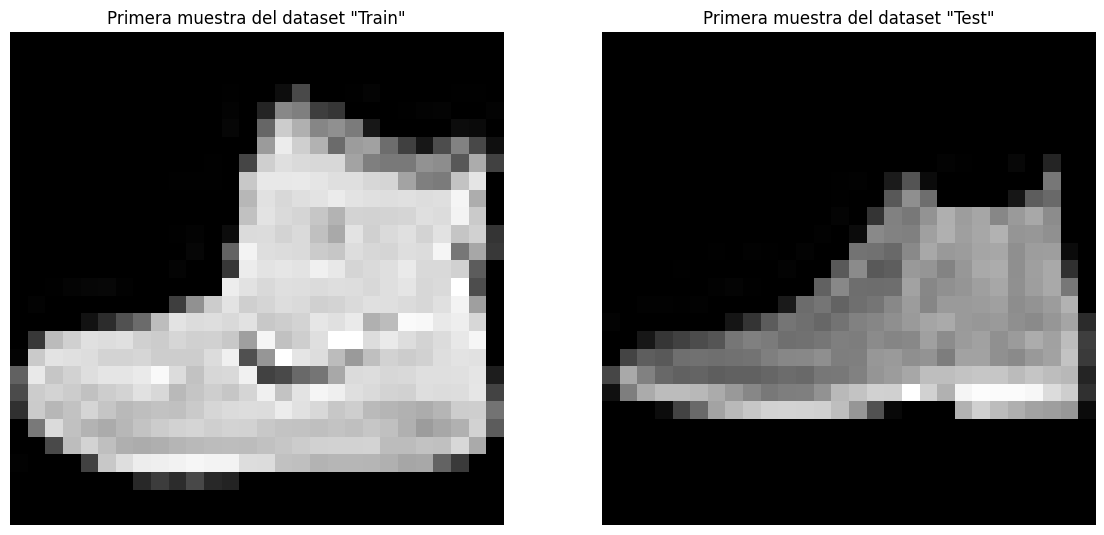

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (14,7))
ax1.imshow(x_train[0])
ax1.title.set_text('Primera muestra del dataset "Train"')
ax1.axis('off')
ax2.imshow(x_test[0])
ax2.title.set_text('Primera muestra del dataset "Test"')
ax2.axis('off')

## 3. Generación de modelos

### 3.1. Separación de los 100 datos especificados

In [6]:
av_x_train = x_train[0:101]
av_y_train = y_train[0:101]

### 3.2. Creación del modelo supervisado

En este caso, se va a crear un modelo supervisado de clasificación de imáganes. La primera aproximación que se hizo a esta red utilizaba capas convolucionales, densas y recurrentes. Pero con un dataset de 100 imágenes, eso no tiene ningún sentido. Hay que tratar de hacer una red simple, con pocos parámetros, para evitar sobreajustes y minimos locales, y obtener un modelo capaz de generalizar bien con tan pocos datos de entrenamiento.

Por ello, se realiza un modelo muy simple, únimente utilizando capas convolucionales y densas con pocas neuronas.

In [7]:
model = Sequential()

model.add(Conv2D(5, (3,3), input_shape = (28, 28, 1), activation = 'relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(10, (3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(10, activation="sigmoid"))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 5)         50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 10)        460       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 490)               0         
                                                                 
 dense (Dense)               (None, 10)                4

#### 3.2.1. Entrenamiento del modelo supervisado

Se entrena el modelo supervisado utilizando 2 callbacks. Uno para reducir progresivamete el LR, y otro para detener prematuramente el entrenamiento (por si no se reduce la función de pérdidas, o empieza a aumetar, para evitar el sobreentrenamiento)

In [8]:
# Entrenamiento
epochs = 500
batch_size = 128

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.00001)

# Entrenamos el modelo
history = model.fit(av_x_train, av_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split = 0.1, callbacks=[early_stop, reduce_lr])

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 2.2829 - accuracy: 0.1778 - val_loss: 2.1944 - val_accuracy: 0.2727 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - 0s 32ms/step - loss: 2.2428 - accuracy: 0.2667 - val_loss: 2.1827 - val_accuracy: 0.3636 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 2.2043 - accuracy: 0.3333 - val_loss: 2.1721 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - 0s 31ms/step - loss: 2.1671 - accuracy: 0.3556 - val_loss: 2.1620 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - 0s 34ms/step - loss: 2.1307 - accuracy: 0.4000 - val_loss: 2.1524 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 2.0950 - accuracy: 0.4222 - val_loss: 2.1433 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - 0s 34ms/step - loss: 2.0595 - acc

Y se muestra la evolución de la función de pérdidas, tanto para el conjunto de datos de entrenamiento como de validación

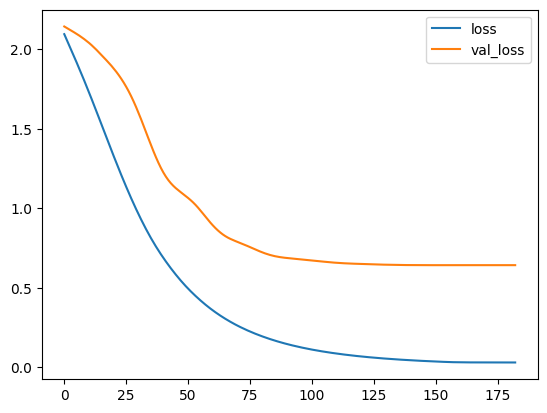

In [9]:
plt.figure
plt.plot(history.history['loss'][5:],label="loss")
plt.plot(history.history['val_loss'][5:],label="val_loss")
plt.legend()

Y por úlitmo, se puede evaluar este modelo sobre el dataset de test.

In [94]:
cnn_eval = [[y_test[_], np.argmax(model.predict(x_test[_:_+1]))] for _ in range(100)]
cnn_eval_df = pd.DataFrame(cnn_eval)
cnn_eval_df['correct'] = [1 if cnn_eval_df.iloc[_,0] == cnn_eval_df.iloc[_,1] else 0 for _ in range(cnn_eval_df.shape[0])]
aciertos = cnn_eval_df[cnn_eval_df.iloc[:,2] == 1].shape[0]
fallos = cnn_eval_df.shape[0] - aciertos

1/1 [==============================] - 0s 19ms/step
Aciertos -> 62
Fallos -> 38
Ratio aciertos -> 62.0 %


In [95]:
print(f'Aciertos -> {aciertos}')
print(f'Fallos -> {fallos}')
print(f'Ratio aciertos -> {aciertos*100/(aciertos+fallos)} %')

Aciertos -> 62
Fallos -> 38
Ratio aciertos -> 62.0 %


### 3.3. Creción de un modelo no supervisado

Otra opción de abordar un problema de este estilo es entrenar un modelo no supervisado. En este caso se utiliza un modelo basado en PCA y Kmeans, sobre los datos no utilizados con el modelo supervisado

En primer lugar se seleccionan las imágenes restantes no etiquetadas

In [10]:
unsup_x_train = x_train[101:]

Y se hace un reshape para poder implementar un PCA

In [11]:
unsup_x_train = unsup_x_train.reshape(-1, 28 * 28)

Una vez ajustados los datos, un método sencillo de resolver el problema de clasificación consiste en aplicar un PCA y posteriormente un algoritmo de KMeans, para agrupar los datos en el grupo de clusteres deseads. En este caso, dado que hay 10 tipos de prendas de ropa en el dataset Fashion Mnist, se crean 10 clusteres.

1. Instanciación del PCA

In [67]:
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(unsup_x_train)

2. Instanciación del algoritmo de KMeans con 10 clusteres

In [68]:
kmeans = KMeans(n_clusters=10, random_state=0)

3. Entrenamiento y predicción con el KMeans

In [69]:
kmeans.fit(x_train_pca)
y_pred = kmeans.predict(x_train_pca)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4. Visualización de los datos

Una vez entrenado el algoritmo de KMeans, se puede realizar una visualización para ver cómo ha agrupado los datos. Esta visualización agrupa en filas los clusteres (una fila debería tener prendas del mismo tipo)

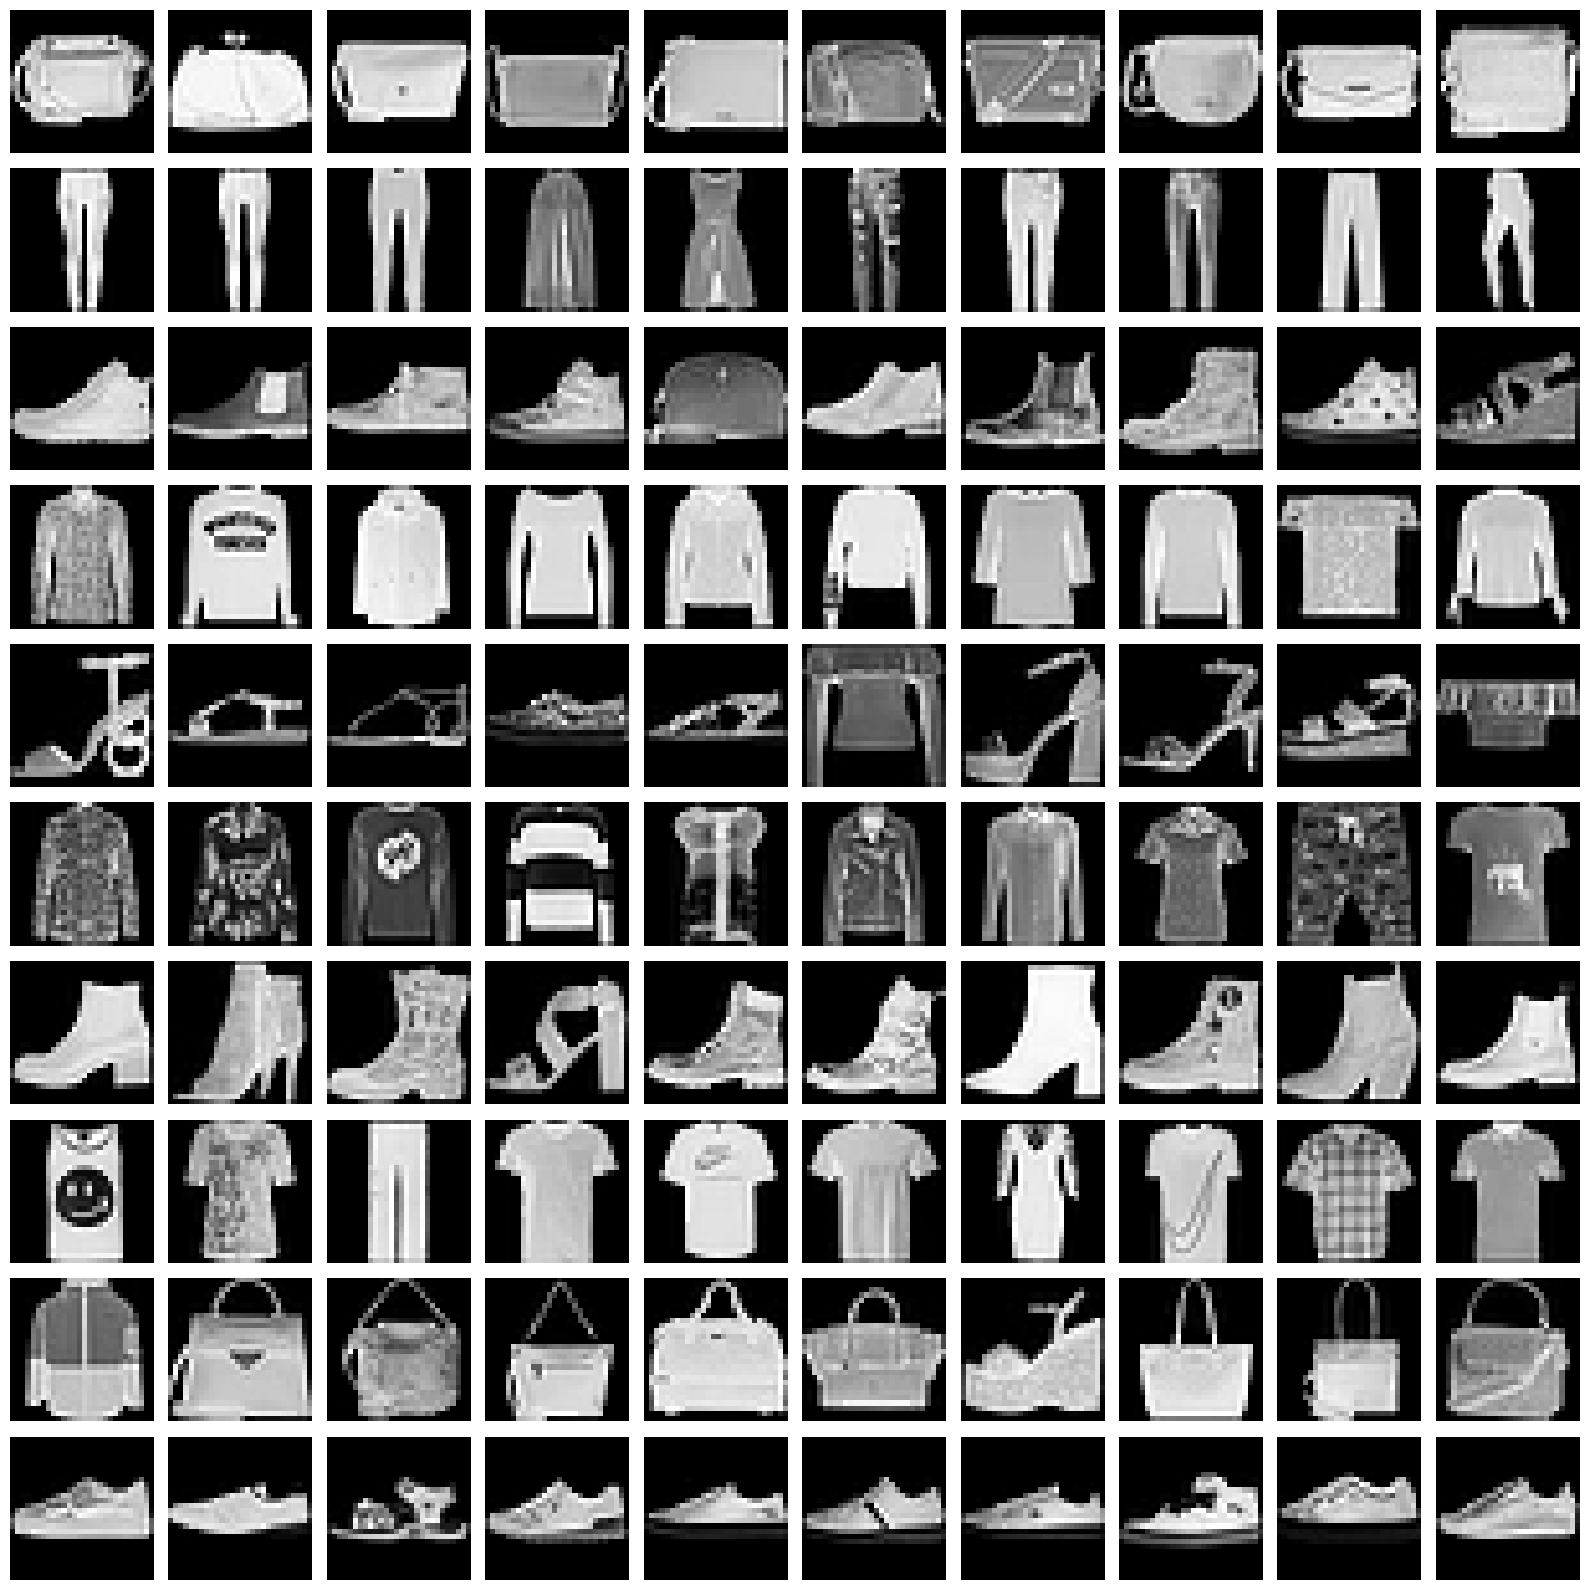

In [65]:
fig, axs = plt.subplots(10, 10, sharey=False, tight_layout=True, figsize=(16,16), facecolor='white')
k=0
for i in range(0,10):
    for j in range(0,10):
        axs[i,j].matshow(unsup_x_train[np.where(y_pred == i)[0][0:10][j]].reshape(28,28) , cmap='gray')
        axs[i,j].axis('off')
plt.show() 

Como se ha podido comprobar, se puede compilar un clasificador de imágenes de múltiples maneras. Los calsificadores supervisados tienen la ventaja de ser relativamente sencillos de implementar y testear, pero tienen la desventajade necesitar datos etiquetados, lo que además de ser caro, puede dar lugar a errores por un mal eqtiquetado.

Por otra parte, los clasificadores no supervisados tienen la ventaja de prescindir de datasets con datos etiquetados, pero con la desventaja de que la evaluación de los mismos es mas compleja, y el tunning del clasificador puede resultar tedioso (hay que ajustar los parámetros del PCA y el KMeans hasta conseguir los resultados deseados). Por otra parte, necesita un número consideráblemente mayor de datos para ser entrenados.